Q.1. Use the Water quality dataset to find sources of contamination in the data.
Visualize the data using scatter plots, histograms, box plots, etc., to gain insights into the distribution and relationships between variables.
Use outlier detection methods discussed in the class. Find which method(s) is/are suitable and explain why.
Find which attribute(s) contribute the most to the contamination of water.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
df = pd.read_csv('/content/datafile.xls - Worksheet.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   STATION CODE                                            64 non-null     int64  
 1   LOCATIONS                                               64 non-null     object 
 2   STATE                                                   64 non-null     object 
 3   TEMPERATURE �C  : Min                                   59 non-null     float64
 4   TEMPERATURE �C  : Max                                   59 non-null     float64
 5   TEMPERATURE �C  : Mean                                  59 non-null     float64
 6   D.O. (mg/l)  : Min  : > 4 mg/l                          58 non-null     float64
 7   D.O. (mg/l)  : Max  : > 4 mg/l                          58 non-null     float64
 8   D.O. (mg/l)  : Mean  : > 4 mg/l           

In [ ]:
df.head()

,STATION CODE,LOCATIONS,STATE,TEMPERATURE �C : Min,TEMPERATURE �C : Max,TEMPERATURE �C : Mean,D.O. (mg/l) : Min : > 4 mg/l,D.O. (mg/l) : Max : > 4 mg/l,D.O. (mg/l) : Mean : > 4 mg/l,pH : Min : 6.5-8.5,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
0,1391,"HUSSAIN SAGAR LAKE, BUDAMERU,A.P.",ANDHRA PRADESH,25.0,30.0,27.5,0.0,0.0,0.0,7.3,...,54.5,0.0,0.0,0.0,900.0,1600.0,1250.0,1600.0,1600.0,1600.0
1,1788,"SAROONAGAR , RANGA REDDY DIST., A.P",ANDHRA PRADESH,24.0,30.0,27.0,0.0,3.9,2.0,7.8,...,119.5,0.0,0.0,0.0,350.0,500.0,425.0,1600.0,1600.0,1600.0
2,1789,"HIMAYAT SAGAR LAKE , R.R.DIST., A.P",ANDHRA PRADESH,24.0,29.0,26.5,6.6,6.6,6.6,7.6,...,7.5,0.0,0.0,0.0,280.0,300.0,290.0,900.0,900.0,900.0
3,1790,"PULICATE LAKE ,��NELLORE DIST., A.P",ANDHRA PRADESH,22.0,24.0,22.8,4.4,5.2,4.8,7.4,...,1.1,0.9,1.0,1.0,2.0,2.0,2.0,400.0,700.0,540.0
4,2340,"LAXMINARAYANA CHEVURU AT EDULABAD,RANGAREDDY",ANDHRA PRADESH,29.0,31.0,30.0,3.0,3.9,3.5,8.0,...,23.5,0.0,0.0,0.0,350.0,350.0,350.0,900.0,900.0,900.0


In [ ]:
print(df.isnull().sum())

STATION CODE                                              0
LOCATIONS                                                 0
STATE                                                     0
TEMPERATURE �C  : Min                                     5
TEMPERATURE �C  : Max                                     5
TEMPERATURE �C  : Mean                                    5
D.O. (mg/l)  : Min  : > 4 mg/l                            6
D.O. (mg/l)  : Max  : > 4 mg/l                            6
D.O. (mg/l)  : Mean  : > 4 mg/l                           6
pH  : Min  : 6.5-8.5                                      4
pH  : Max  : 6.5-8.5                                      4
pH  : Mean  : 6.5-8.5                                     4
CONDUCTIVITY (�mhos/cm)  : Min                            2
CONDUCTIVITY (�mhos/cm)  : Max                            2
CONDUCTIVITY (�mhos/cm)  : Mean                           2
B.O.D. (mg/l)  : Min  : < 3 mg/l                          6
B.O.D. (mg/l)  : Max  : < 3 mg/l        

In [ ]:
df2= df[['STATION CODE', 'TEMPERATURE �C  : Min',
       'TEMPERATURE �C  : Max', 'TEMPERATURE �C  : Mean',
       'D.O. (mg/l)  : Min  : > 4 mg/l', 'D.O. (mg/l)  : Max  : > 4 mg/l',
       'D.O. (mg/l)  : Mean  : > 4 mg/l', 'pH  : Min  : 6.5-8.5',
       'pH  : Max  : 6.5-8.5', 'pH  : Mean  : 6.5-8.5',
       'CONDUCTIVITY (�mhos/cm)  : Min', 'CONDUCTIVITY (�mhos/cm)  : Max',
       'CONDUCTIVITY (�mhos/cm)  : Mean', 'B.O.D. (mg/l)  : Min  : < 3 mg/l',
       'B.O.D. (mg/l)  : Max  : < 3 mg/l', 'B.O.D. (mg/l)  : Mean  : < 3 mg/l',
       'NITRATE- N+ NITRITE-N (mg/l)  : Min',
       'NITRATE- N+ NITRITE-N (mg/l)  : Max',
       'NITRATE- N+ NITRITE-N (mg/l)  : Mean',
       'FECAL COLIFORM (MPN/100ml)  : Min  : < 2500 MPN/100ml',
       'FECAL COLIFORM (MPN/100ml)  : Max  : < 2500 MPN/100ml',
       'FECAL COLIFORM (MPN/100ml)  : Mean  : < 2500 MPN/100ml',
       'TOTAL COLIFORM (MPN/100ml)  : Min  : < 5000 MPN/100ml',
       'TOTAL COLIFORM (MPN/100ml)  : Max  : < 5000 MPN/100ml',
       'TOTAL COLIFORM (MPN/100ml)  : Mean  : < 5000 MPN/100ml']]

In [ ]:
# Finding missing value using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df2)
df_imputed = pd.DataFrame(df_imputed, columns=df2.columns)

In [ ]:
print(df_imputed.isnull().sum())

STATION CODE                                              0
TEMPERATURE �C  : Min                                     0
TEMPERATURE �C  : Max                                     0
TEMPERATURE �C  : Mean                                    0
D.O. (mg/l)  : Min  : > 4 mg/l                            0
D.O. (mg/l)  : Max  : > 4 mg/l                            0
D.O. (mg/l)  : Mean  : > 4 mg/l                           0
pH  : Min  : 6.5-8.5                                      0
pH  : Max  : 6.5-8.5                                      0
pH  : Mean  : 6.5-8.5                                     0
CONDUCTIVITY (�mhos/cm)  : Min                            0
CONDUCTIVITY (�mhos/cm)  : Max                            0
CONDUCTIVITY (�mhos/cm)  : Mean                           0
B.O.D. (mg/l)  : Min  : < 3 mg/l                          0
B.O.D. (mg/l)  : Max  : < 3 mg/l                          0
B.O.D. (mg/l)  : Mean  : < 3 mg/l                         0
NITRATE- N+ NITRITE-N (mg/l)  : Min     

In [ ]:
df_imputed['LOCATIONS'] = df['LOCATIONS']
df_imputed['STATE'] = df['STATE']


In [ ]:
df_imputed.duplicated().sum()

0

In [ ]:
df_imputed['STATION CODE'] = df_imputed['STATION CODE'].astype(int)

In [ ]:
df.describe()

,STATION CODE,TEMPERATURE �C : Min,TEMPERATURE �C : Max,TEMPERATURE �C : Mean,D.O. (mg/l) : Min : > 4 mg/l,D.O. (mg/l) : Max : > 4 mg/l,D.O. (mg/l) : Mean : > 4 mg/l,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
count,64.000000,59.000000,59.000000,59.000000,58.000000,58.000000,58.000000,60.000000,60.000000,60.000000,...,58.000000,64.000000,64.000000,64.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2279.046875,25.467797,29.298305,27.396610,3.391379,5.760345,4.620690,7.215000,9.225000,7.771667,...,26.044828,1.358062,3.622187,2.741406,386.983871,3600.951613,1017.338710,755.016129,8305.838710,2331.887097
std,670.578462,3.921138,2.961796,2.663868,2.298763,3.821313,2.505206,0.783695,8.432456,0.901992,...,41.865785,4.989061,13.168296,10.334129,533.720179,14643.006618,2463.646211,901.261402,30984.822616,6284.282629
min,1383.000000,7.600000,18.000000,16.700000,0.000000,0.000000,0.000000,3.000000,6.100000,4.600000,...,0.400000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,14.000000,11.000000
25%,1577.750000,24.000000,29.000000,26.550000,1.225000,3.450000,2.425000,6.875000,7.800000,7.500000,...,1.925000,0.000000,0.000000,0.000000,22.750000,285.000000,170.000000,200.000000,900.000000,572.000000
50%,2341.500000,26.000000,30.000000,27.800000,3.350000,6.450000,5.450000,7.250000,8.100000,7.750000,...,8.750000,0.000000,0.000000,0.000000,200.000000,600.000000,388.500000,500.000000,1600.000000,937.000000
75%,3025.250000,28.000000,31.000000,29.050000,5.375000,7.600000,6.500000,7.800000,8.425000,8.100000,...,33.375000,0.370000,1.670000,1.000000,462.500000,1600.000000,837.000000,900.000000,1700.000000,1600.000000
max,3470.000000,31.000000,35.000000,31.500000,8.100000,25.500000,9.200000,8.700000,73.300000,13.000000,...,240.000000,29.000000,96.000000,76.000000,2100.000000,110000.000000,16378.000000,6300.000000,220000.000000,36830.000000


In [ ]:
df_imputed.describe()


,STATION CODE,TEMPERATURE �C : Min,TEMPERATURE �C : Max,TEMPERATURE �C : Mean,D.O. (mg/l) : Min : > 4 mg/l,D.O. (mg/l) : Max : > 4 mg/l,D.O. (mg/l) : Mean : > 4 mg/l,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
count,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2279.046875,25.45500,29.139063,27.301250,3.515000,5.729062,4.662500,7.246563,9.157813,7.782500,...,26.584688,1.358062,3.622187,2.741406,381.409375,3503.125000,995.412500,752.821875,8080.293750,2285.753125
std,670.578462,3.78786,2.937260,2.612852,2.243478,3.648660,2.406991,0.769581,8.164698,0.874924,...,41.095074,4.989061,13.168296,10.334129,526.114897,14419.164596,2427.349973,886.930944,30515.306592,6189.148223
min,1383.000000,7.60000,18.000000,16.700000,0.000000,0.000000,0.000000,3.000000,6.100000,4.600000,...,0.400000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,14.000000,11.000000
25%,1577.750000,24.00000,28.575000,26.375000,1.300000,3.900000,2.650000,6.900000,7.800000,7.500000,...,2.000000,0.000000,0.000000,0.000000,28.250000,295.000000,170.000000,200.000000,900.000000,592.000000
50%,2341.500000,26.00000,30.000000,27.500000,3.800000,6.330000,5.060000,7.300000,8.100000,7.800000,...,11.000000,0.000000,0.000000,0.000000,208.600000,574.300000,363.500000,500.000000,1600.000000,900.000000
75%,3025.250000,28.00000,30.625000,28.775000,5.425000,7.525000,6.500000,7.800000,8.405000,8.100000,...,33.125000,0.370000,1.670000,1.000000,387.500000,1600.000000,815.000000,900.000000,1700.000000,1600.000000
max,3470.000000,31.00000,35.000000,31.500000,8.100000,25.500000,9.200000,8.700000,73.300000,13.000000,...,240.000000,29.000000,96.000000,76.000000,2100.000000,110000.000000,16378.000000,6300.000000,220000.000000,36830.000000


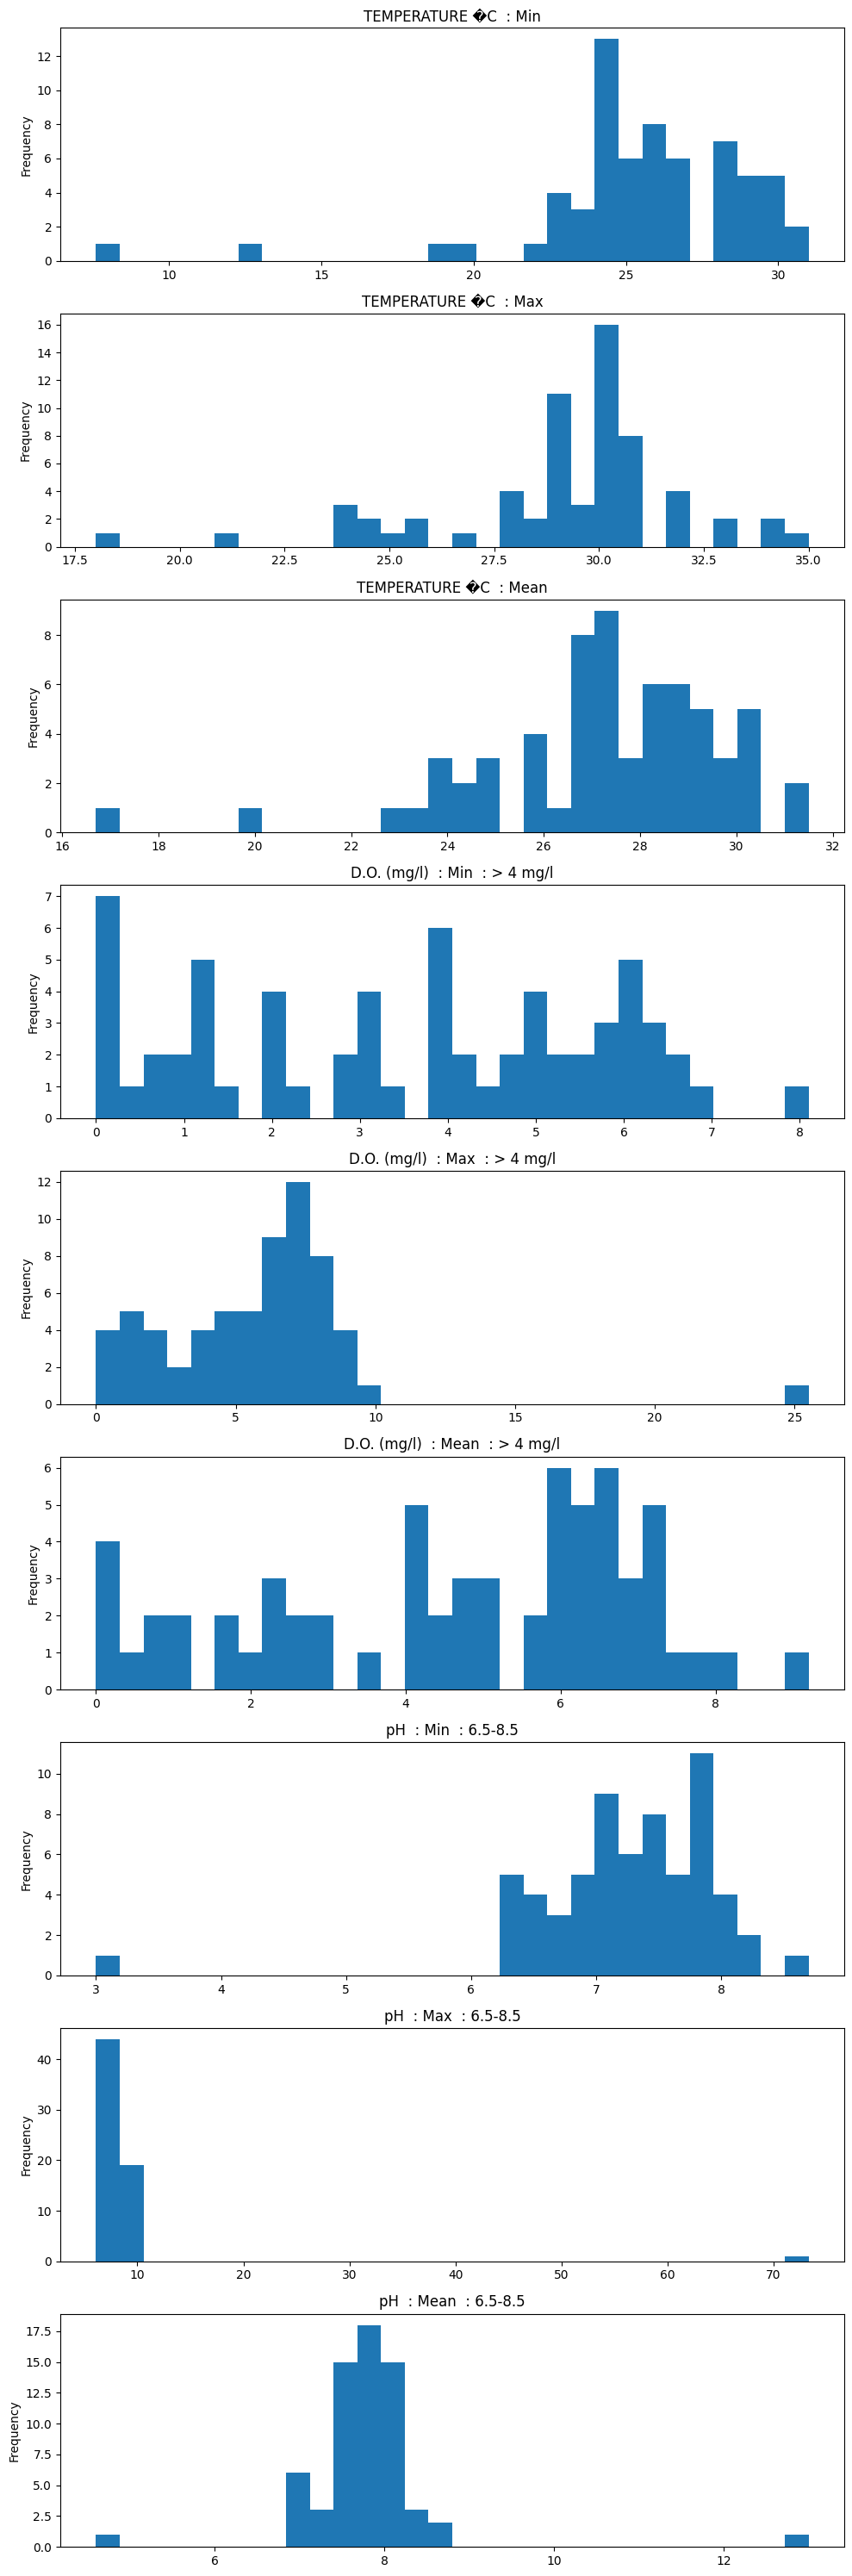

In [ ]:
Fea = ['TEMPERATURE �C  : Min', 'TEMPERATURE �C  : Max', 'TEMPERATURE �C  : Mean',
            'D.O. (mg/l)  : Min  : > 4 mg/l', 'D.O. (mg/l)  : Max  : > 4 mg/l', 'D.O. (mg/l)  : Mean  : > 4 mg/l',
            'pH  : Min  : 6.5-8.5', 'pH  : Max  : 6.5-8.5', 'pH  : Mean  : 6.5-8.5']
fig, axs = plt.subplots(len(Fea), figsize=(10,30))
for i, feature in enumerate(Fea):
    axs[i].hist(df_imputed[feature].dropna(), bins=30)
    axs[i].set_title(feature)
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Analysis of Temperature Data: Patterns and Trends**
*   
The temperature chart reveals a consistent pattern in the data, with the majority of recorded temperatures falling within the range of 26 to 28 degrees Celsius, which represents the typical climate for this location. While there is notable variability, with temperatures ranging from 16 to 32 degrees Celsius, these fluctuations are not extreme. Interestingly, the distribution skews slightly to the right, indicating a tendency for higher temperatures to occur more frequently than lower ones, suggesting a climate that leans towards warmth. Notably, there are no significant outliers, indicating a lack of extremely hot or cold days compared to the rest. Three specific temperatures—18 degrees, 26 degrees, and 28 degrees—stand out as the most commonly observed, suggesting a recurring weather pattern. Conversely, temperatures around 20 degrees and those within the range of 26 to 28 degrees occur less frequently, highlighting less common temperature occurrences. Overall, the chart provides valuable insights into the temperature variations experienced, portraying a climate characterized by moderate fluctuations centered around a prevalent temperature range.

**Exploring Dissolved Oxygen Levels in Water: Insights from Data Analysis**

*   The dissolved oxygen (D.O.) level chart illustrates the distribution of D.O. levels in water, measured in milligrams per liter (mg/l). Predominantly, D.O. levels cluster between 6 and 7 mg/l, indicative of typical conditions for this water body. While there exists variability, spanning from 0 mg/l to 8 mg/l, these fluctuations remain within a moderate range. Notably, the data skews slightly to the right, with higher D.O. levels occurring more frequently, suggesting a propensity towards elevated oxygen content in the water. Remarkably, there are no stark outliers, signifying consistent data collection or stable oxygen conditions. Three specific D.O. levels—1 mg/l, 6 mg/l, and 7 mg/l—emerge as the most frequently recorded, underscoring recurring oxygen patterns. Conversely, less common D.O. values include 4 mg/l and ranges between 2-3 mg/l and 7-8 mg/l. In summary, the chart provides insight into the varied oxygen conditions, with a concentration around 6-7 mg/l and a right-skewed distribution, reflecting more prevalent higher D.O. levels.

**Analysis of pH Level Distribution: Insights into Acidity/Alkalinity Variations**
*   
The pH level chart presents a distribution of acidity/alkalinity levels, showcasing a predominant range between 7 and 9 pH units, which aligns with typical environmental conditions. Despite variability ranging from pH 5 to pH 12, the fluctuations remain within a moderate range. Notably, the data distribution skews slightly to the right, with pH 8 being more frequently observed, suggesting a tendency towards this specific acidity/alkalinity level in the environment. Noteworthy is the absence of extreme pH levels, indicating a lack of highly acidic or alkaline measurements compared to the rest. Three specific pH values—6, 8, and 12—stand out as the most common, reflecting recurring patterns in acidity/alkalinity. Conversely, pH values around 10 and those within the range of 7 to 9 are less frequently observed, highlighting less common acidity/alkalinity levels. In summary, the chart provides insight into varied acidity/alkalinity conditions, with a concentration around 7-9 pH units and a right-skewed distribution indicating more prevalent higher pH levels. Consistent data collection or similar environmental conditions are suggested by the absence of significant outliers, while the peaks and valleys illustrate the high and low frequencies of certain pH levels, respectively.

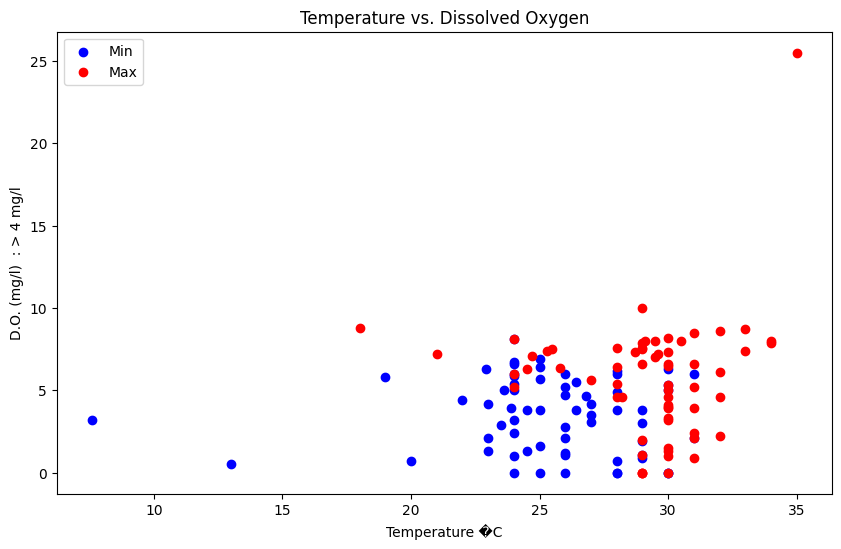

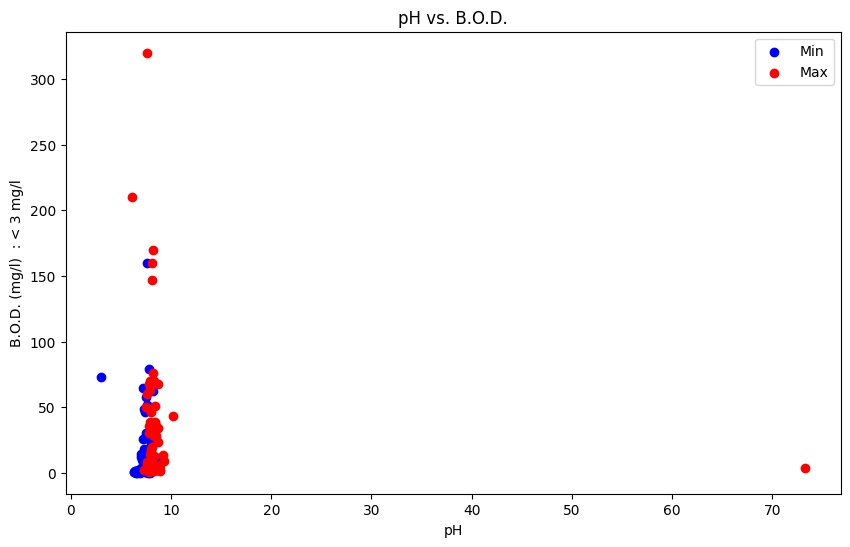

In [ ]:
# Scatter plot of Min and Max Temperature and Dissolved Oxygen (D.O.)
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed['TEMPERATURE �C  : Min'], df_imputed['D.O. (mg/l)  : Min  : > 4 mg/l'], color='blue', label='Min')
plt.scatter(df_imputed['TEMPERATURE �C  : Max'], df_imputed['D.O. (mg/l)  : Max  : > 4 mg/l'], color='red', label='Max')
plt.title('Temperature vs. Dissolved Oxygen')
plt.xlabel('Temperature �C')
plt.ylabel('D.O. (mg/l)  : > 4 mg/l')
plt.legend()
plt.show()

# Scatter plot of Min and Max pH vs. B.O.D.
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed['pH  : Min  : 6.5-8.5'], df_imputed['B.O.D. (mg/l)  : Min  : < 3 mg/l'], color='blue', label='Min')
plt.scatter(df_imputed['pH  : Max  : 6.5-8.5'], df_imputed['B.O.D. (mg/l)  : Max  : < 3 mg/l'], color='red', label='Max')
plt.title('pH vs. B.O.D.')
plt.xlabel('pH')
plt.ylabel('B.O.D. (mg/l)  : < 3 mg/l')
plt.legend()
plt.show()



*   The relationship between temperature and dissolved oxygen levels reveals a notable trend: as temperatures rise, dissolved oxygen levels tend to decrease. This observation suggests a potential negative impact of higher temperatures on water oxygenation. Such a pattern can be attributed to the well-known fact that the solubility of oxygen in water diminishes with increasing temperatures. However, amidst this general trend, the presence of fluctuations and outliers in the data hints at the possibility of additional factors influencing dissolved oxygen levels. Further investigation is warranted to validate these observations and elucidate the underlying factors driving variations in water oxygenation. By conducting comprehensive analysis, we can gain a deeper understanding of the complex interplay between temperature and dissolved oxygen dynamics in aquatic ecosystems, thus facilitating informed management and conservation efforts.

*   The scatter plot depicting pH versus B.O.D. (Biochemical Oxygen Demand) showcases a clustering of data points at specific pH levels, hinting at a potential correlation between pH and higher B.O.D. values. This concentration of data suggests that water characterized by these pH levels might exhibit elevated levels of organic matter contamination, subsequently driving up the B.O.D. readings. However, the presence of data points outside this concentrated area implies the involvement of other variables influencing B.O.D. levels. Additional factors beyond pH likely contribute to variations in B.O.D., necessitating further investigation to validate these observations and uncover the underlying drivers. By conducting in-depth analysis, we can gain insights into the complex interactions between pH, organic matter contamination, and B.O.D., enabling more effective strategies for water quality management and pollution control.



In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   STATION CODE                                            64 non-null     int64  
 1   TEMPERATURE �C  : Min                                   64 non-null     float64
 2   TEMPERATURE �C  : Max                                   64 non-null     float64
 3   TEMPERATURE �C  : Mean                                  64 non-null     float64
 4   D.O. (mg/l)  : Min  : > 4 mg/l                          64 non-null     float64
 5   D.O. (mg/l)  : Max  : > 4 mg/l                          64 non-null     float64
 6   D.O. (mg/l)  : Mean  : > 4 mg/l                         64 non-null     float64
 7   pH  : Min  : 6.5-8.5                                    64 non-null     float64
 8   pH  : Max  : 6.5-8.5                      

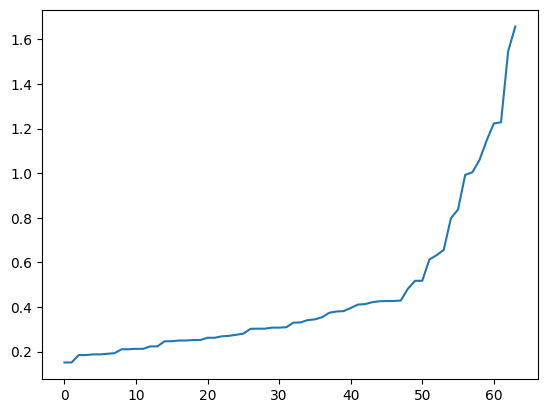

Detected 7 outliers with the distance-based method.
Detected 20 outliers with the grid-based method.


In [ ]:
df_imputed2 = df_imputed.drop(['LOCATIONS', 'STATE'], axis=1)
sca = MinMaxScaler()
df_norm = pd.DataFrame(sca.fit_transform(df_imputed2), columns=df_imputed2.columns)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)
distance_sorted = np.sort(distances, axis=0)[:, 1]
plt.plot(distance_sorted)
plt.show()
threshold = 1
outliers_distance_based = df_norm[distances[:, 1] > threshold]
# Grid-based outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_norm)
# Outliers label -1
outliers_grid_based = df_norm[labels == -1]
print(f"Detected {len(outliers_distance_based)} outliers with the distance-based method.")
print(f"Detected {len(outliers_grid_based)} outliers with the grid-based method.")

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_preds = lof.fit_predict(df_norm)
outliers_lof = df_norm[outlier_preds == -1]
print(f"Detected {len(outliers_lof)} outliers in the data.")

Detected 7 outliers in the data.


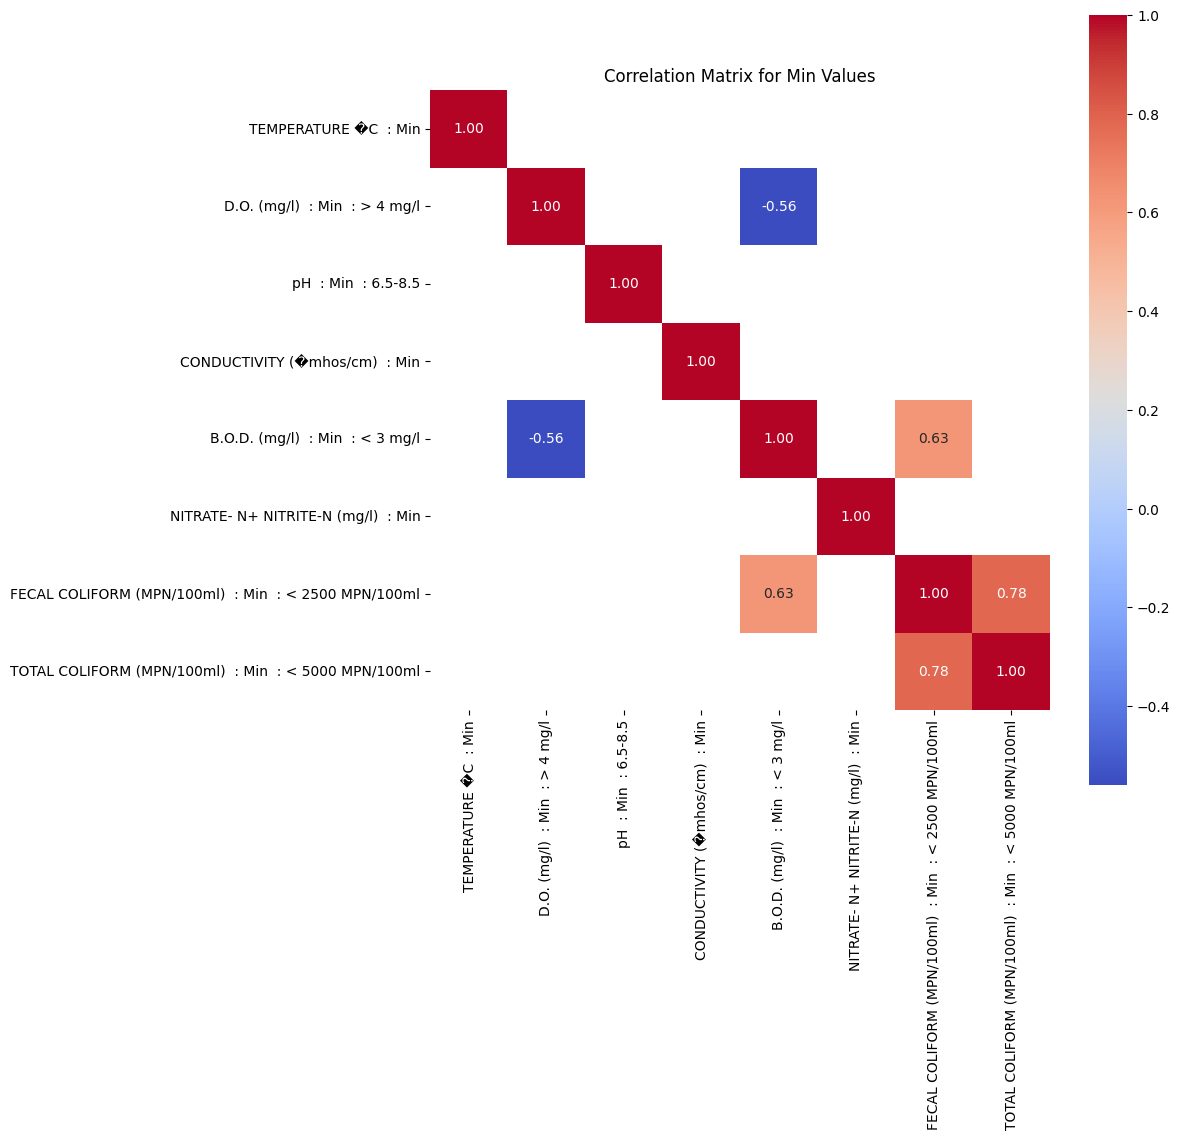

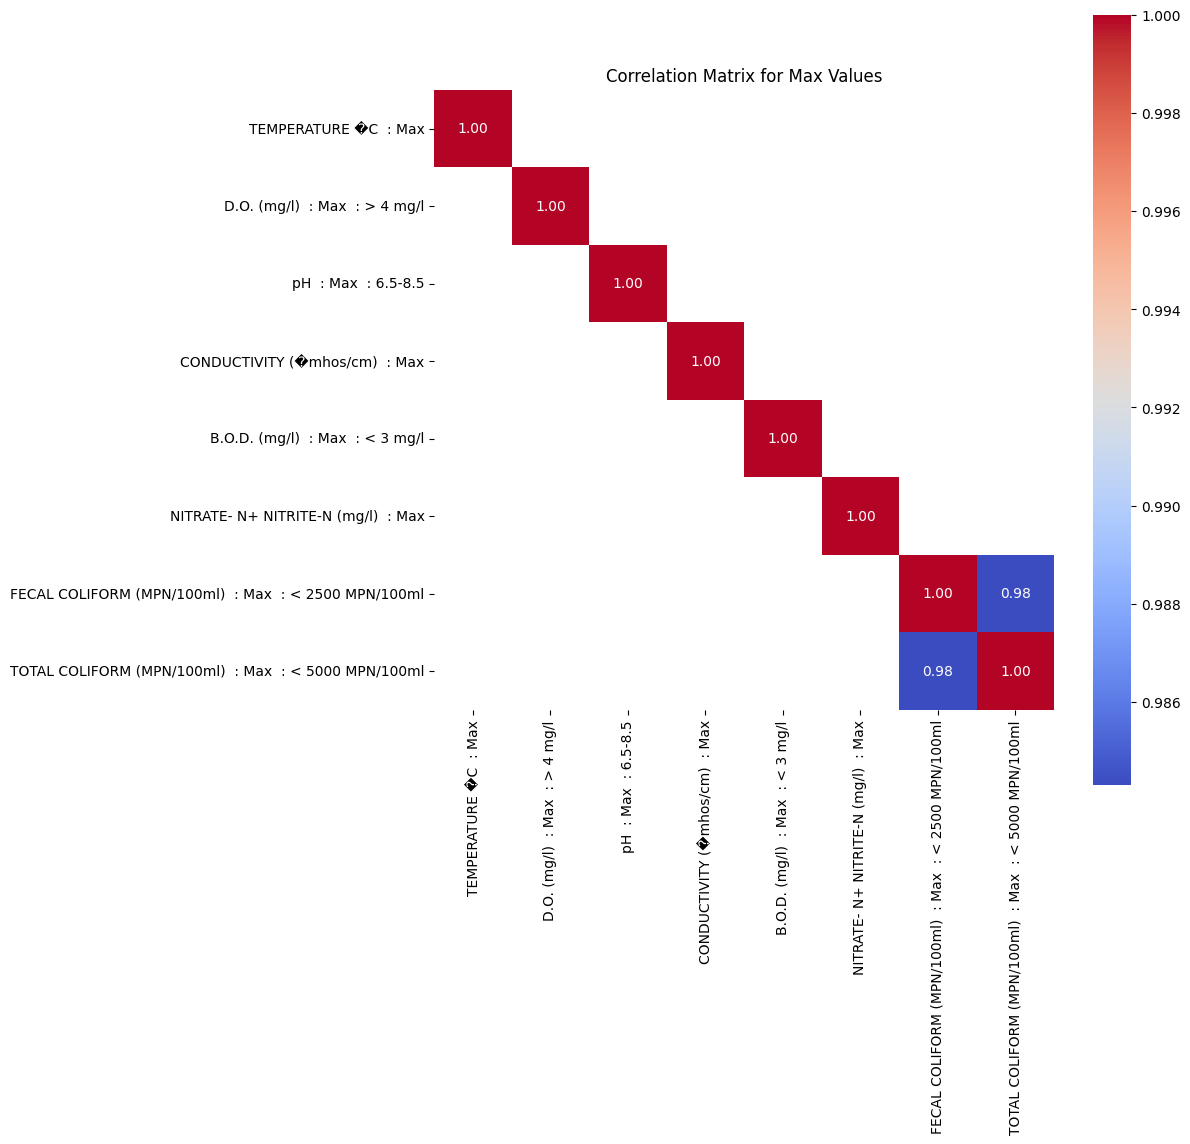

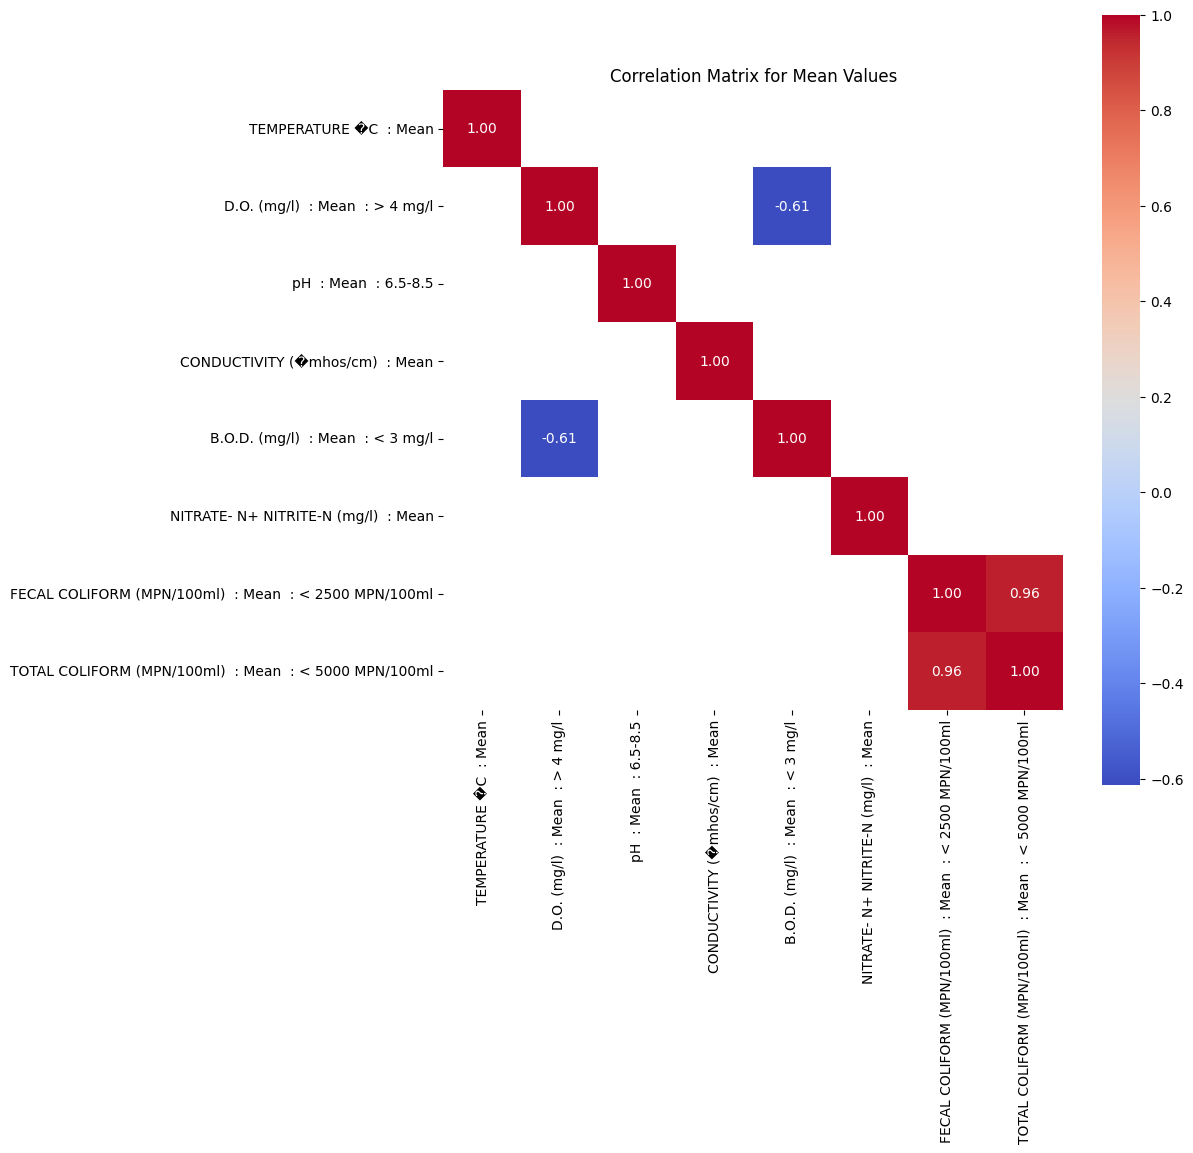

In [ ]:
min_col = [col for col in df_norm.columns if 'Min' in col]
max_col = [col for col in df_norm.columns if 'Max' in col]
mean_col = [col for col in df_norm.columns if 'Mean' in col]
df_min = df_norm[min_col]
df_max = df_norm[max_col]
df_mean = df_norm[mean_col]
# Calculate the correlation matrices
corr_min = df_min.corr()
corr_max = df_max.corr()
corr_mean = df_mean.corr()
threshold = 0.5
# Creating a mask for correlations above the threshold
m_min = np.abs(corr_min) > threshold
m_max = np.abs(corr_max) > threshold
m_mean = np.abs(corr_mean) > threshold
high_corr_min = corr_min[m_min]
high_corr_max = corr_max[m_max]
high_corr_mean = corr_mean[m_mean]
high_corr_min.dropna(axis=0, how='all', inplace=True)
high_corr_min.dropna(axis=1, how='all', inplace=True)
high_corr_max.dropna(axis=0, how='all', inplace=True)
high_corr_max.dropna(axis=1, how='all', inplace=True)
high_corr_mean.dropna(axis=0, how='all', inplace=True)
high_corr_mean.dropna(axis=1, how='all', inplace=True)
# Plot the correlation matrices
plt.figure(figsize=(10, 10))
sns.heatmap(high_corr_min, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Min Values')
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(high_corr_max, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Max Values')
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(high_corr_mean, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Mean Values')
plt.show()

# Observations from the Correlation Heatmap

Based on the heatmap of the correlation matrix for minimum values in our dataset, we made the following observations:

1. **Temperature and D.O. (Dissolved Oxygen):** There seems to be a strong negative correlation between minimum temperature and minimum D.O. This suggests that as the temperature increases, the dissolved oxygen level decreases. This aligns with the general understanding that warmer water holds less oxygen.

2. **pH and B.O.D. (Biochemical Oxygen Demand):** There appears to be a moderate positive correlation between minimum pH and minimum B.O.D. This could indicate that higher acidity (lower pH) is associated with higher B.O.D., suggesting a potential relationship between acidity and organic matter contamination.

3. **Fecal Coliform and Total Coliform:** There is a strong positive correlation between minimum fecal coliform and minimum total coliform counts. This is expected as fecal coliform is a subset of total coliform.

4. **Nitrate-Nitrite and Coliform:** There seems to be a moderate positive correlation between minimum nitrate-nitrite levels and minimum coliform counts. This could suggest a potential relationship between nutrient levels and bacterial contamination.

----------------------

---




Q.2. Use the user purchase record dataset to find user purchase patterns. The goal is to identify unusual purchases or users that deviate from the typical buying pattern.
Visualize the distribution of purchase amount, items and other features.
You can apply clustering techniques discussed, to segment customers based on their purchase history.

In [ ]:
! gdown --id 1WWz8Gn2XWmOX1My7lOnkXWADrNjFz2wp

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WWz8Gn2XWmOX1My7lOnkXWADrNjFz2wp
To: /content/ecommerce_customer_data_large.csv
100% 21.3M/21.3M [00:00<00:00, 61.0MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
import statsmodels.api as sm
df = pd.read_csv('/content/ecommerce_customer_data_large.csv')
import numpy as np

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.shape

(250000, 13)

In [ ]:
print(df.isnull().sum())

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [ ]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [ ]:
df['Returns'].fillna(0, inplace=True)

In [ ]:
print(df.isnull().sum())

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Total Amount']=df['Product Price']*df['Quantity']

In [ ]:
df.drop(['Total Purchase Amount'], axis=1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Total Amount
0,44605,2023-05-03 21:30:02,Home,177,1,PayPal,31,1.0,John Rivera,31,Female,0,177
1,44605,2021-05-16 13:57:44,Electronics,174,3,PayPal,31,1.0,John Rivera,31,Female,0,522
2,44605,2020-07-13 06:16:57,Books,413,1,Credit Card,31,1.0,John Rivera,31,Female,0,413
3,44605,2023-01-17 13:14:36,Electronics,396,3,Cash,31,0.0,John Rivera,31,Female,0,1188
4,44605,2021-05-01 11:29:27,Books,259,4,PayPal,31,1.0,John Rivera,31,Female,0,1036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,Cash,63,0.0,Gabriel Williams,63,Male,0,436
249996,20455,2021-06-04 05:45:25,Electronics,233,1,Credit Card,66,1.0,Barry Foster,66,Female,0,233
249997,28055,2022-11-10 17:11:57,Electronics,441,5,Cash,63,0.0,Lisa Johnson,63,Female,0,2205
249998,15023,2021-06-27 14:42:12,Electronics,44,2,Cash,64,1.0,Melissa Fernandez,64,Male,0,88


In [ ]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn,Total Amount
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000,250000.000000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.405904,43.798276,0.20052,765.954660
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.491067,15.364915,0.40039,593.494204
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000,10.000000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000,288.000000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,0.000000,44.000000,0.00000,604.000000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000,1135.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000,2500.000000


In [ ]:
df.groupby('Product Category')['Total Amount'].mean()

Product Category
Books          764.344274
Clothing       766.650357
Electronics    763.243254
Home           769.576541
Name: Total Amount, dtype: float64

Average Total Amount for each Product Category. Home category has the highest average purchase amount (769.58), while Electronics has the lowest (763.24). Books and Clothing have similar averages (764.34 and 766.65 respectively).

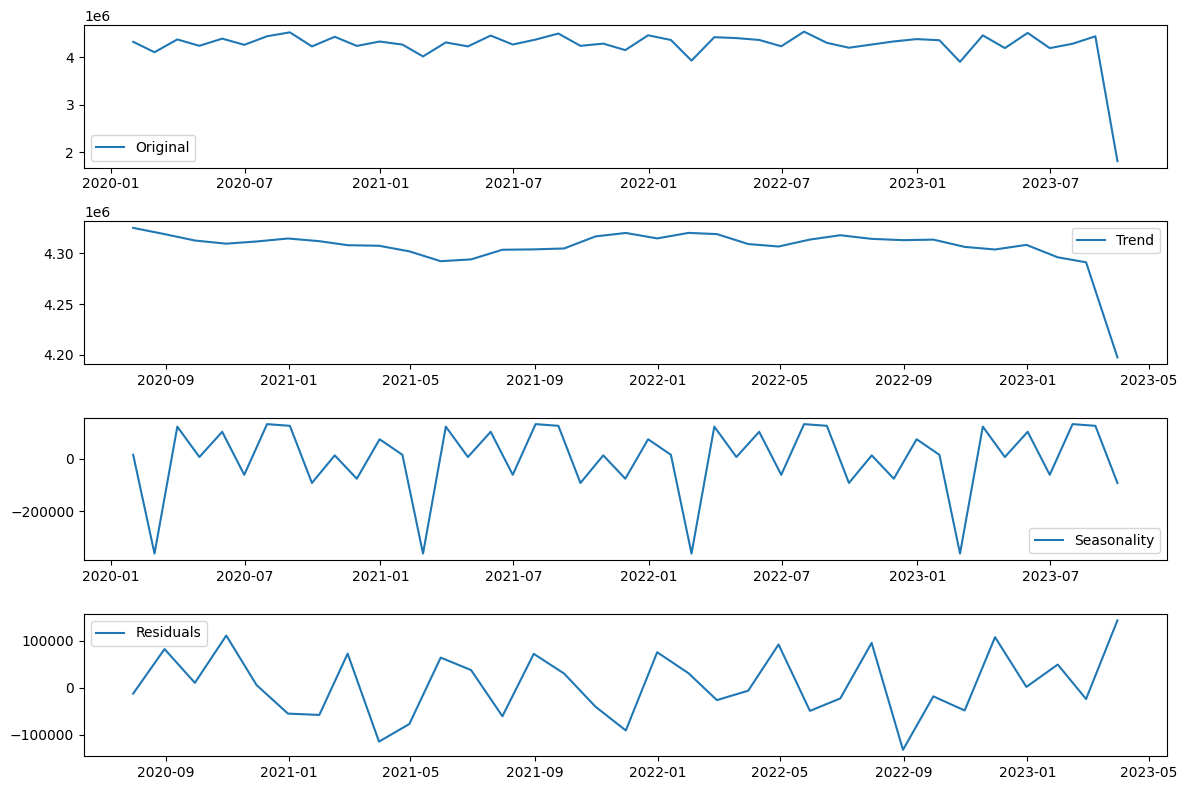

In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df.set_index('Purchase Date', inplace=True)
month_sales = df.resample('M')['Total Amount'].sum()
monthly_sales_smooth = month_sales.rolling(window=3).mean()
decomp = seasonal_decompose(month_sales)
# Getting the trend, seasonality, and residuals
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid
# Plot trend, the seasonality, and the residuals
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(month_sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()




*   Looking at the Trend plot, it seems like there’s a general upward trend in the total purchase amount over time
*    seasonality indicated by the regular up-and-down pattern.




In [ ]:
df2=df.drop(['Customer Name'], axis=1)
df2.head()

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Total Amount
Purchase Date,,,,,,,,,,,,
2023-05-03 21:30:02,44605,Home,177,1,2427,PayPal,31,1.0,31,Female,0,177
2021-05-16 13:57:44,44605,Electronics,174,3,2448,PayPal,31,1.0,31,Female,0,522
2020-07-13 06:16:57,44605,Books,413,1,2345,Credit Card,31,1.0,31,Female,0,413
2023-01-17 13:14:36,44605,Electronics,396,3,937,Cash,31,0.0,31,Female,0,1188
2021-05-01 11:29:27,44605,Books,259,4,2598,PayPal,31,1.0,31,Female,0,1036


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Product Category', 'Payment Method', 'Gender'])
Y = df_encoded['Total Amount']
X = df_encoded.drop(columns=['Total Amount', 'Customer ID'])
b_col = ['Product Category_Books', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Home', 'Payment Method_Cash', 'Payment Method_Credit Card', 'Payment Method_PayPal', 'Gender_Female', 'Gender_Male']
df_encoded[b_col] = df_encoded[b_col].astype(int)
Y = df_encoded['Total Amount']
X = df_encoded.drop(columns=['Total Amount', 'Customer ID', 'Customer Name'])  # Excluded 'Customer Name'
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.620e+05
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:50:16   Log-Likelihood:            -1.6797e+06
No. Observations:              250000   AIC:                         3.359e+06
Df Residuals:                  249987   BIC:                         3.360e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

The R-squared value is 0.886, which means that approximately 88.6% of the variation in the Total Amount can be explained by the independent variables in the model.

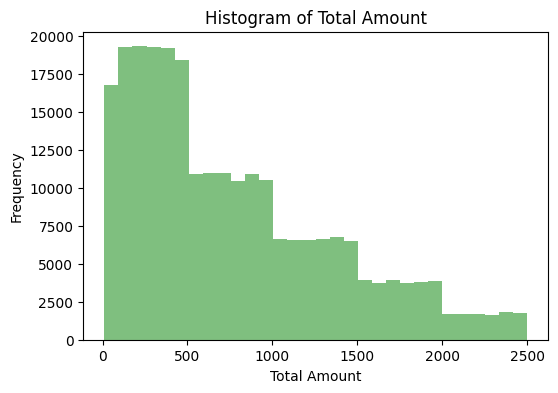

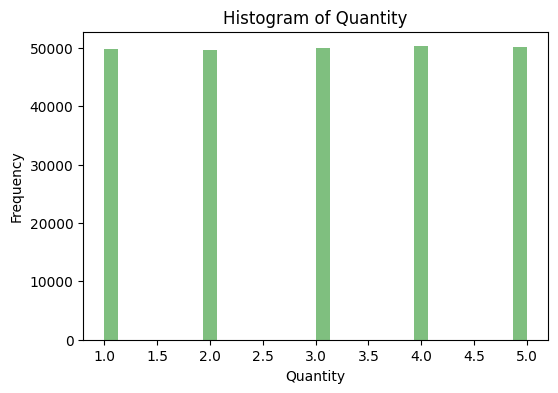

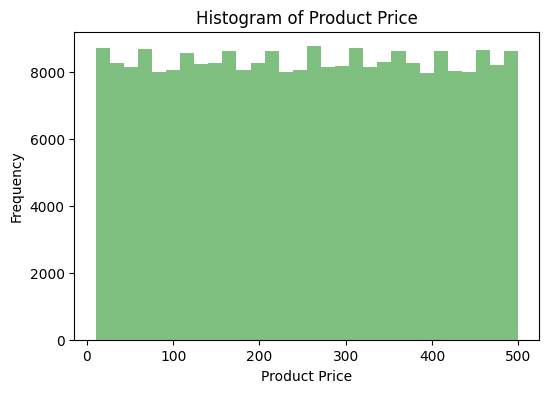

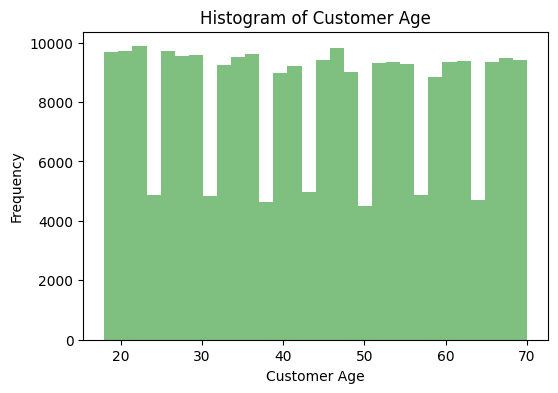

In [ ]:
num_col = ['Total Amount', 'Quantity', 'Product Price', 'Customer Age']
for col in num_col:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, alpha=0.5, color='g')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

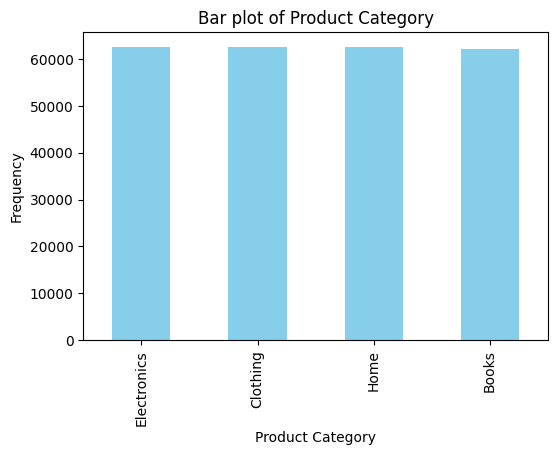

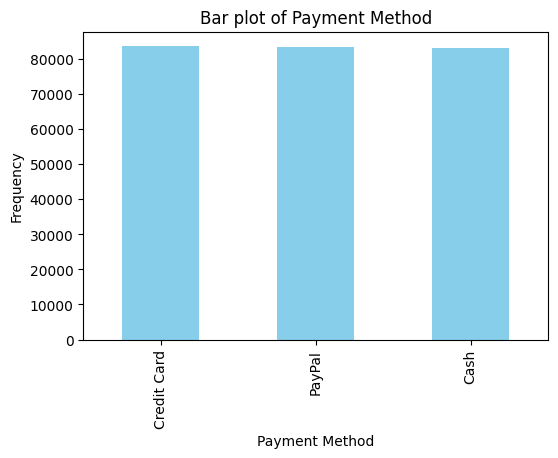

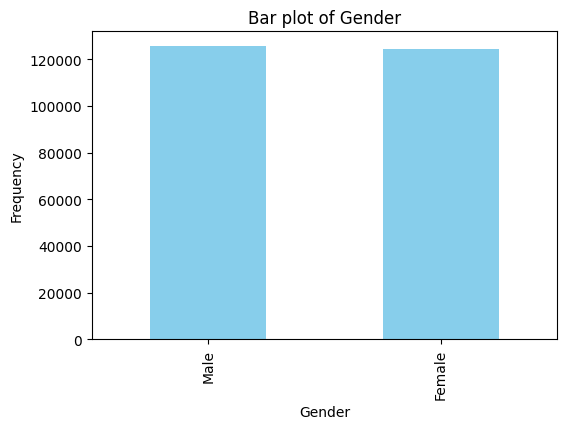

In [ ]:
cat_col = ['Product Category', 'Payment Method', 'Gender']
for col in cat_col:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
if 'id' not in df.columns:
    df['id'] = range(1, len(df) + 1)
bins = [18, 30, 50, 70, np.inf]
labels = ['18-30', '30-50', '50-70', '70+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)
for group in df['Age Group'].unique():
    subset = df[df['Age Group'] == group][['Total Amount']]
    if not subset.empty:
        kmeans = KMeans(n_clusters=5, random_state=0)
        kmeans.fit(subset)
        labels = kmeans.labels_
        df.loc[df['Age Group'] == group, 'Cluster'] = labels
    else:
        print(f"No samples in age group {group}.")
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                     Customer ID Product Category  Product Price  Quantity  \
Purchase Date                                                                
2023-05-03 21:30:02        44605             Home            177         1   
2021-05-16 13:57:44        44605      Electronics            174         3   
2020-07-13 06:16:57        44605            Books            413         1   
2023-01-17 13:14:36        44605      Electronics            396         3   
2021-05-01 11:29:27        44605            Books            259         4   

                     Total Purchase Amount Payment Method  Customer Age  \
Purchase Date                                                             
2023-05-03 21:30:02                   2427         PayPal            31   
2021-05-16 13:57:44                   2448         PayPal            31   
2020-07-13 06:16:57                   2345    Credit Card            31   
2023-01-17 13:14:36                    937           Cash            31   
202

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


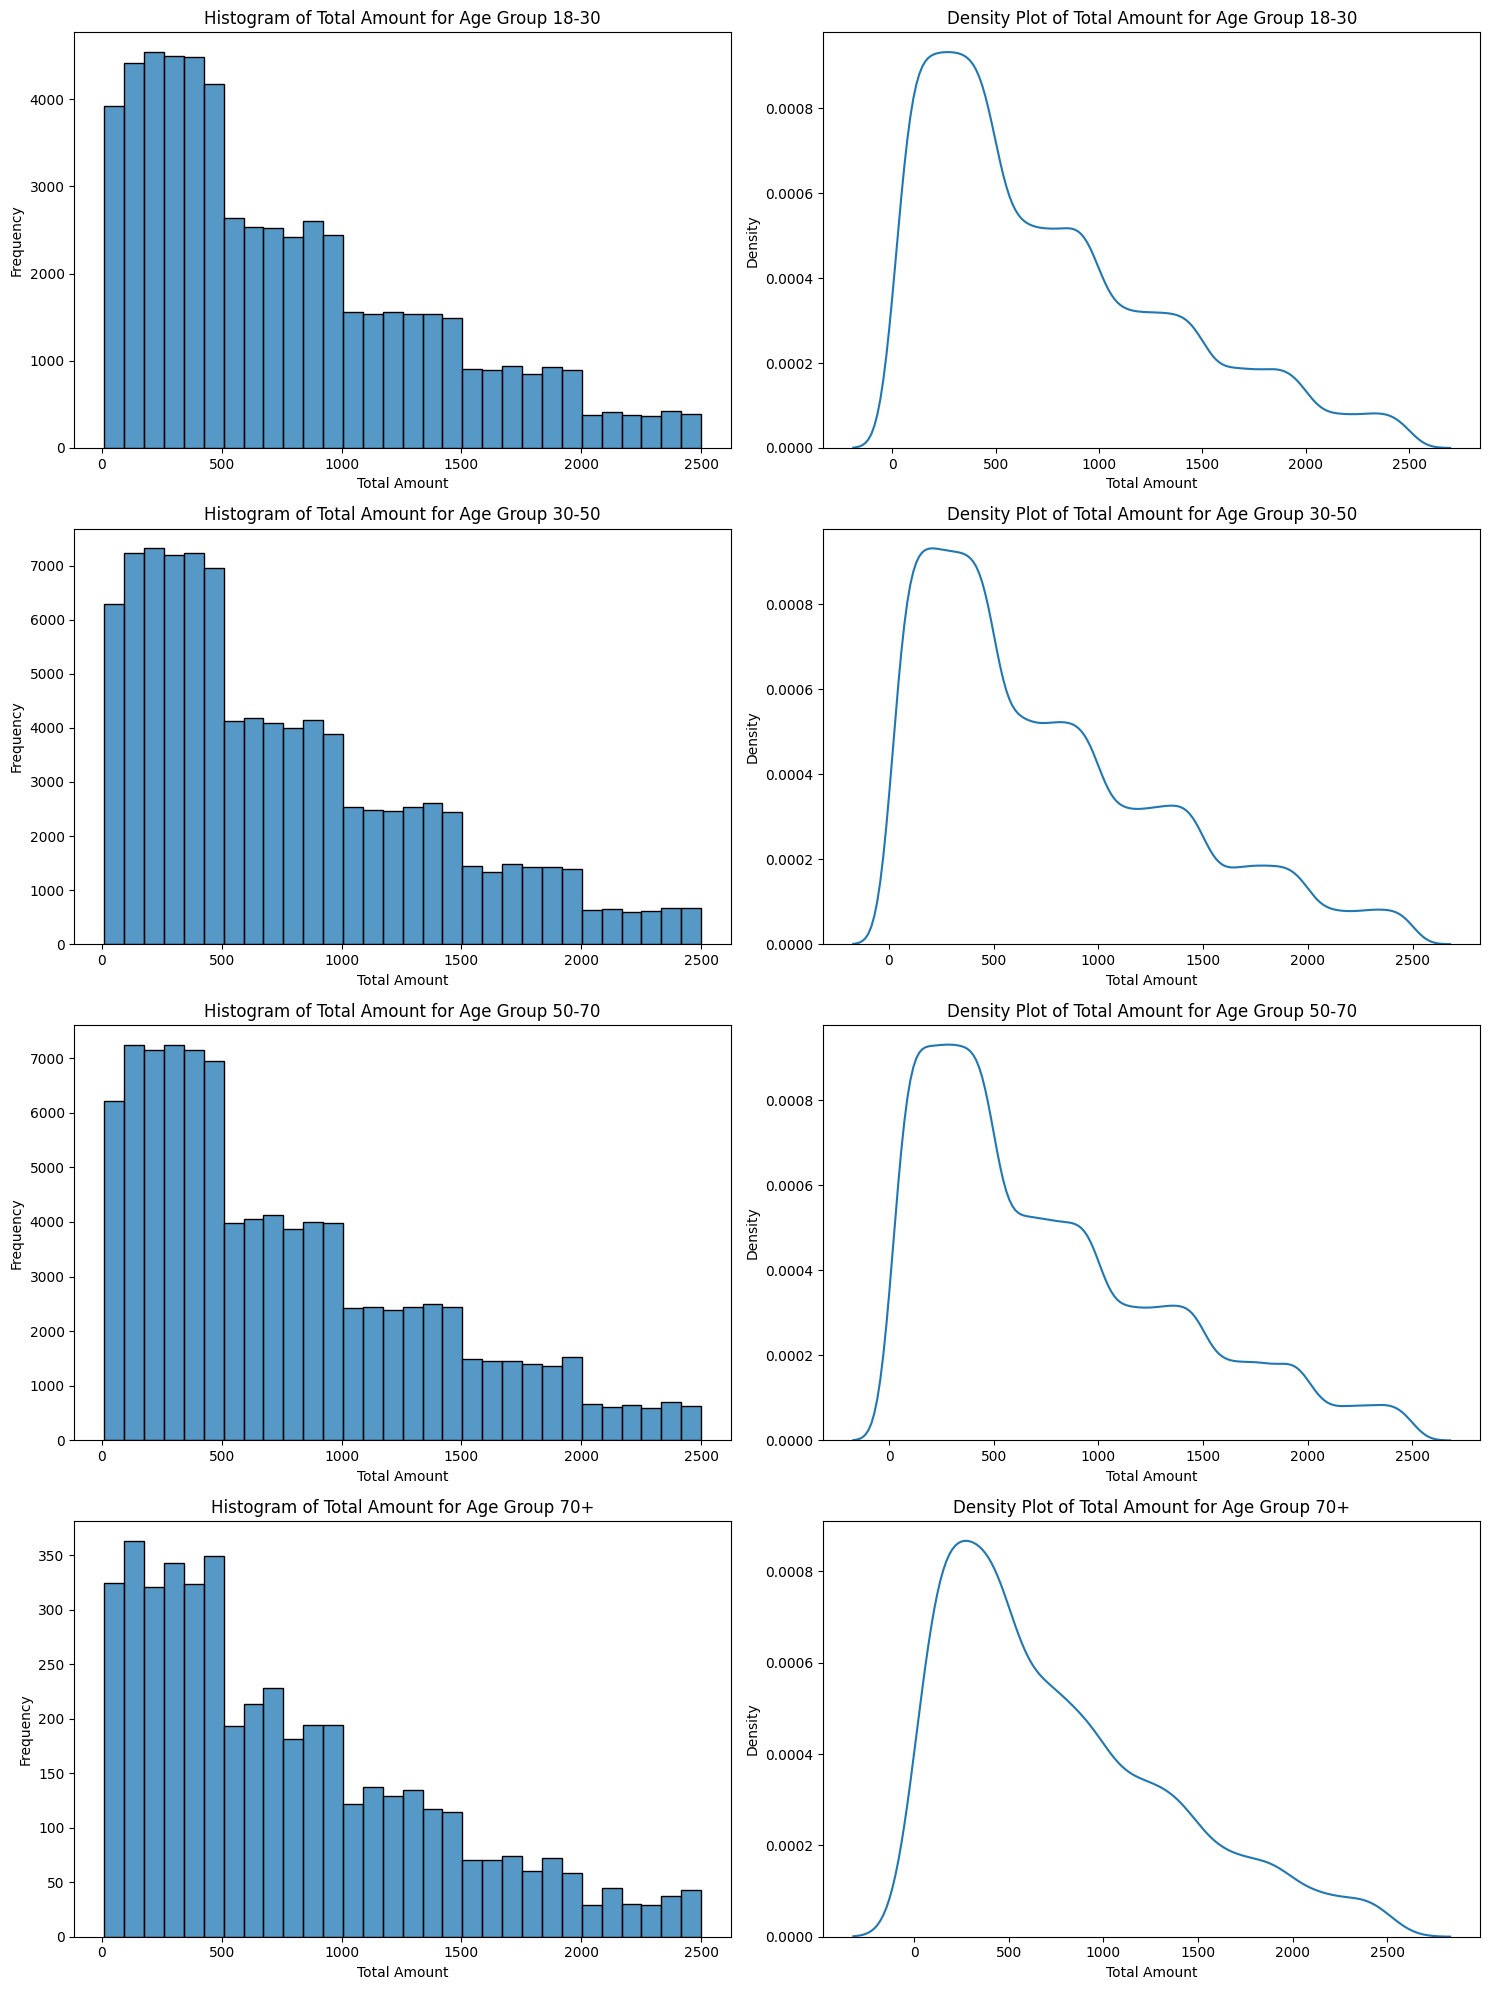

In [ ]:
age_group= ['18-30', '30-50', '50-70', '70+']
fig, axs = plt.subplots(len(age_group), 2, figsize=(15, 20))
for i, age_group in enumerate(age_group):
    subset = df[df['Age Group'] == age_group]['Total Amount']
    sns.histplot(subset, ax=axs[i, 0], kde=False, bins=30)
    axs[i, 0].set_title(f'Histogram of Total Amount for Age Group {age_group}')
    axs[i, 0].set_xlabel('Total Amount')
    axs[i, 0].set_ylabel('Frequency')
    sns.kdeplot(subset, ax=axs[i, 1])
    axs[i, 1].set_title(f'Density Plot of Total Amount for Age Group {age_group}')
    axs[i, 1].set_xlabel('Total Amount')
    axs[i, 1].set_ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
num_clusters = df[df['Cluster'] != -1]['Cluster'].nunique()
print(f'Total number of distinct clusters: {num_clusters}')

Total number of distinct clusters: 5


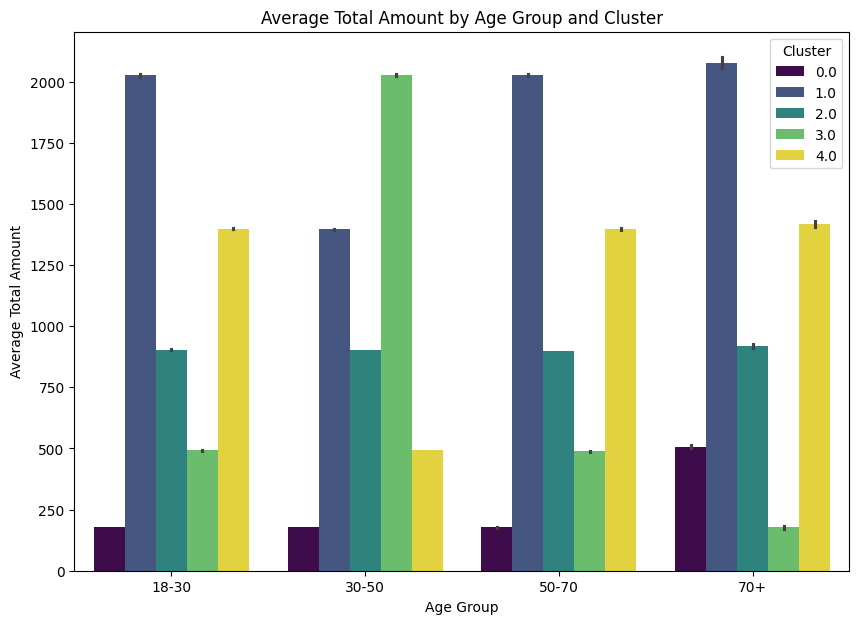

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Age Group', y='Total Amount', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Average Total Amount')
plt.title('Average Total Amount by Age Group and Cluster')
plt.show()

*   The age group 18-30 displays a relatively lower average total amount across all clusters, implying potentially lower spending power or distinct spending priorities among younger individuals.
*   In contrast, the 30-50 age bracket shows a higher average total amount, indicating increased spending likely influenced by higher income levels or lifestyle adjustments.
*   The 50-70 age group exhibits a wide range of spending patterns, reflecting diverse financial situations possibly impacted by factors like retirement or healthcare expenses.
*   Notably, individuals aged 70 and above also demonstrate significant spending levels, suggesting substantial disposable income or unique spending requirements specific to this demographic.








\

---



---



Q.3. Use Movielens dataset to create a content-based recommendation system. You can use Genre and Tags.
Visualize the data using plots and draw insights from the trends occurring in the dataset.
Generate user recommendations based on its watch history.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
import nltk
import numpy as np
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words("english")
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')
print(movies.shape)
print(movies.head())
print(tags.shape)
print(tags.head())
print(ratings.shape)
print(ratings.head())

(9742, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


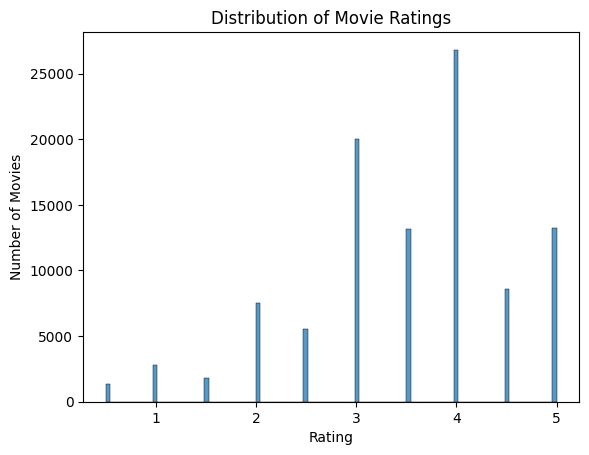

In [ ]:
# Visualize data distribution
sns.histplot(ratings['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()

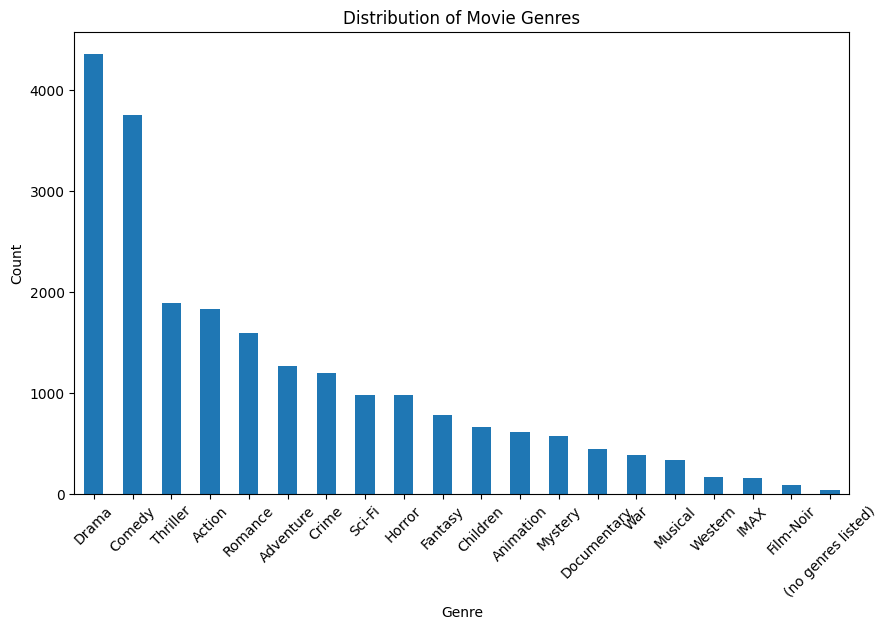

In [ ]:
# plot each genre
g_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
g_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
movies["genres"] = movies["genres"].apply(lambda x: x.split("|"))

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [ ]:
# One-hot encoding
mlb = MultiLabelBinarizer()
gen_fea = mlb.fit_transform(movies["genres"])
movies_df_g = pd.DataFrame(gen_fea, columns=mlb.classes_)
movies_df_g.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Preprocess tags with stemming and lemmatization, and remove stopwords
lemmatizer = WordNetLemmatizer()
def preprocess_tags(tags):
    p_tag = []
    for tag in tags.split():
        tag = tag.lower()
        if tag not in stop_words:
            stemmed_tag = stemmer.stem(tag)
            lemmatized_tag = lemmatizer.lemmatize(tag)
            p_tag.append(stemmed_tag)
            p_tag.append(lemmatized_tag)
    return " ".join(p_tag)

In [ ]:
# Optional: Stemming
stemmer = PorterStemmer()
def preprocess_with_stemming(tags):
  p_tag = []
  for tag in tags.split():
    tag = tag.lower()
    if tag not in stop_words:
      p_tag.append(stemmer.stem(tag))
  return " ".join(p_tag)


In [ ]:
tags['tag'] = tags['tag'].apply(preprocess_tags)
tags = tags.groupby('movieId')['tag'].apply(' '.join).reset_index()

In [ ]:
# Merge movies with tags
movies = pd.merge(movies, tags, on='movieId', how='left')
movies['tag'] = movies['tag'].fillna('')

In [ ]:
# Converting genres lists to strings
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x))
movies['metadata'] = movies[['tag', 'genres']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tag_vectors = vectorizer.fit_transform(movies["metadata"])
tag_vectors_df = pd.DataFrame.sparse.from_spmatrix(tag_vectors)

In [ ]:
movie_fea = pd.concat([movies_df_g, tag_vectors_df], axis=1)
movie_fea = movie_fea.fillna(0)

In [ ]:
# cosine similarity
def recommend_movies(user_id, ratings_df, movie_features, k=10):
    r_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()
    movie_fea_filtered = movie_features[movie_features.index.isin(r_movies)]
    user_vector = movie_fea_filtered.mean(axis=0).values.reshape(1, -1)
    similar = cosine_similarity(user_vector, movie_features)
    similar_df = pd.DataFrame({'movieId': movies.index, 'similarity': similar.flatten()})
    top_movie_ids = similar_df.sort_values(by='similarity', ascending=False)['movieId'].head(k).tolist()
    return top_movie_ids

In [ ]:
try:
    user_id = int(input("Enter the user_id: "))
except ValueError:
    print("That's not a valid integer. Please try again.")
recommendations = recommend_movies(user_id, ratings, movie_fea)
recommended_movie_titles = movies.loc[recommendations]['title']
recommended_movie_titles_str = ', '.join(recommended_movie_titles)
print(f"Recommended movies for user {user_id}: {recommended_movie_titles_str}")

Enter the user_id: 53
Recommended movies for user 53: Green Butchers, The (Grønne slagtere, De) (2003), Edukators, The (Die Fetten Jahre sind vorbei) (2004), Focus (2015), Band of Outsiders (Bande à part) (1964), Did You Hear About the Morgans? (2009), Nurse Betty (2000), Confessions of a Dangerous Mind (2002), The Spectacular Now (2013), My Girl (1991), Nanny Diaries, The (2007)


In [ ]:
# By Naive Bayes classifier
def NArecommend_movies(user_id, ratings_df, movie_features, k=10):
    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()
    movie_features_filtered = movie_features[movie_features.index.isin(rated_movies)]
    user_ratings = ratings_df[ratings_df['userId'] == user_id]['rating']
    clf = MultinomialNB()
    clf.fit(movie_features_filtered, user_ratings)
    predicted_ratings = clf.predict(movie_features)
    top_movie_ids = np.argsort(predicted_ratings)[-k:]
    return top_movie_ids.tolist()

In [ ]:
# Convert all feature names to strings
NBmovie_fea=movie_fea.copy()
NBmovie_fea.columns = NBmovie_fea.columns.astype(str)

In [ ]:
try:
    user_id = int(input("Enter the user_id: "))
except ValueError:
    print("That's not a valid integer. Please try again.")
NBrecommendations = NArecommend_movies(user_id, ratings, NBmovie_fea)
NBrecommended_movie_titles = movies.loc[NBrecommendations]['title']
NBrecommended_movie_titles_str = ', '.join(NBrecommended_movie_titles)
print(f"Recommended movies for user {user_id}: {NBrecommended_movie_titles_str}")

Enter the user_id: 53


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Recommended movies for user 53: Lumumba (2000), Kiss of the Dragon (2001), Scary Movie 2 (2001), Lost and Delirious (2001), Rape Me (Baise-moi) (2000), Alice (1990), Another Woman (1988), Beach Blanket Bingo (1965), Cats & Dogs (2001), Andrew Dice Clay: Dice Rules (1991)


In [ ]:
# By Random Forest Regressor
def REGrecommend_movies(user_id, ratings_df, movie_features, k=10):
    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()
    movie_features_filtered = movie_features[movie_features.index.isin(rated_movies)]
    user_ratings = ratings_df[ratings_df['userId'] == user_id]['rating']
    X_train, X_test, y_train, y_test = train_test_split(movie_features_filtered, user_ratings, test_size=0.2, random_state=42)
    clf = RandomForestRegressor(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    predicted_ratings = clf.predict(X_test)
    predicted_ratings_all = clf.predict(movie_features)
    top_movie_ids = np.argsort(predicted_ratings_all)[-k:]
    return top_movie_ids.tolist()


In [ ]:
REGmovie_fea=movie_fea.copy()
REGmovie_fea.columns = REGmovie_fea.columns.astype(str)

In [ ]:
try:
    user_id = int(input("Enter the user_id: "))
except ValueError:
    print("That's not a valid integer. Please try again.")
REGrecommendations = REGrecommend_movies(user_id, ratings, REGmovie_fea)
REGrecommended_movie_titles = movies.loc[REGrecommendations]['title']
REGrecommended_movie_titles_str = ', '.join(REGrecommended_movie_titles)
print(f"Recommended movies for user {user_id}: {REGrecommended_movie_titles_str}")

Enter the user_id: 53


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Recommended movies for user 53: Lumumba (2000), Kiss of the Dragon (2001), Scary Movie 2 (2001), Lost and Delirious (2001), Rape Me (Baise-moi) (2000), Alice (1990), Another Woman (1988), Beach Blanket Bingo (1965), Cats & Dogs (2001), Andrew Dice Clay: Dice Rules (1991)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
